#    <.....................................Social Network Analysis ........................................>
###    <............................................................................ Amir Ali .................................................................................>

![](https://user-images.githubusercontent.com/46146748/63127038-62273800-bf7f-11e9-914f-bd1c431c76f2.png)

## Import Libraries

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

## Import Dataset
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.<br>
**Source:** https://snap.stanford.edu/data/ego-Facebook.html

In [29]:
G1 =nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [30]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


## Methods for Analysis

### 1. Betweenness Centrality

[107, 1684, 3437, 1912, 1085]

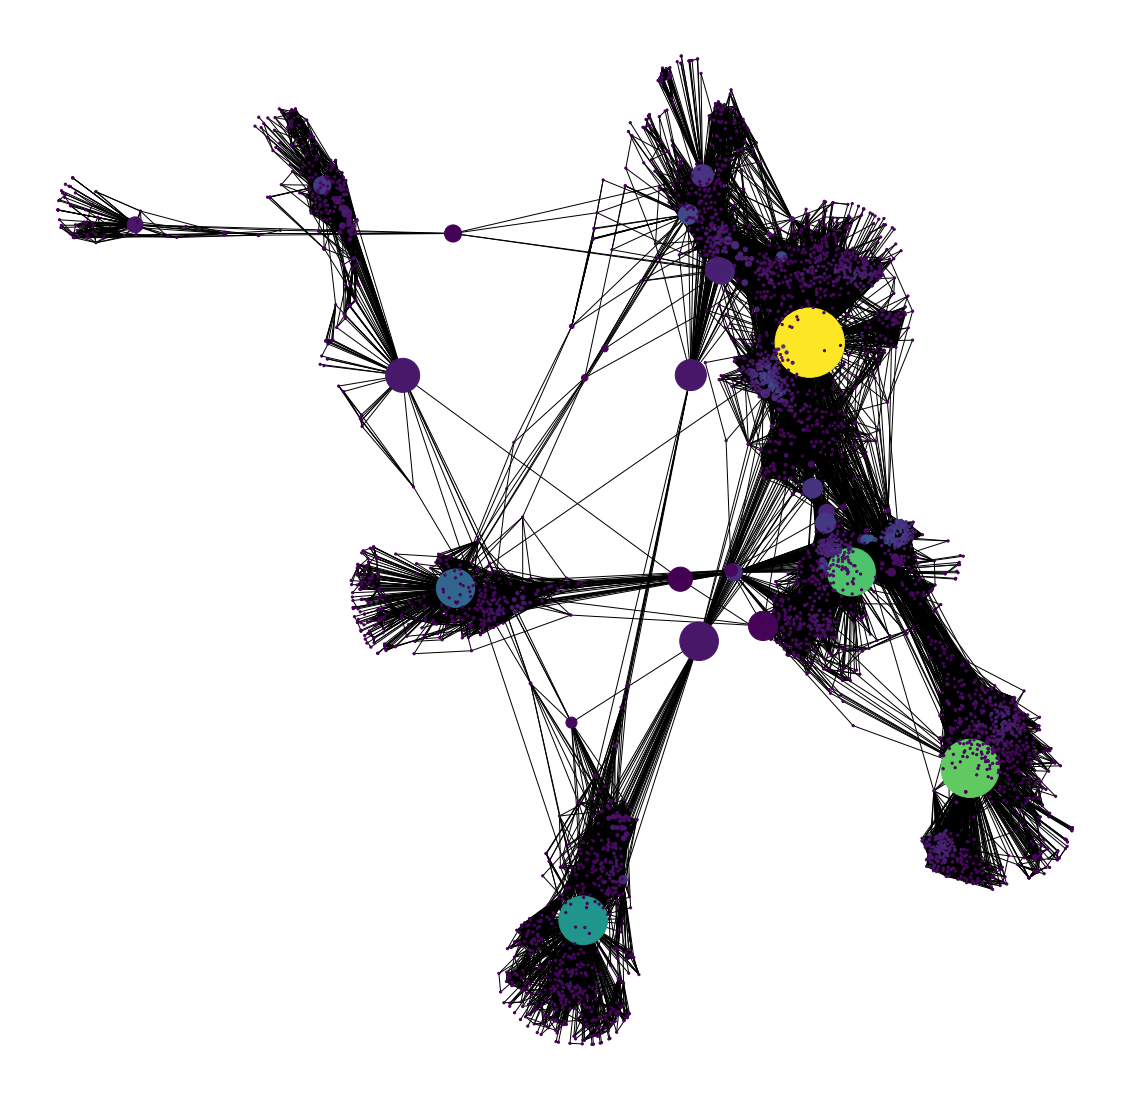

In [17]:
pos = nx.spring_layout(G1)
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

### 2. Degree Centrality

[107, 1684, 1912, 3437, 0]

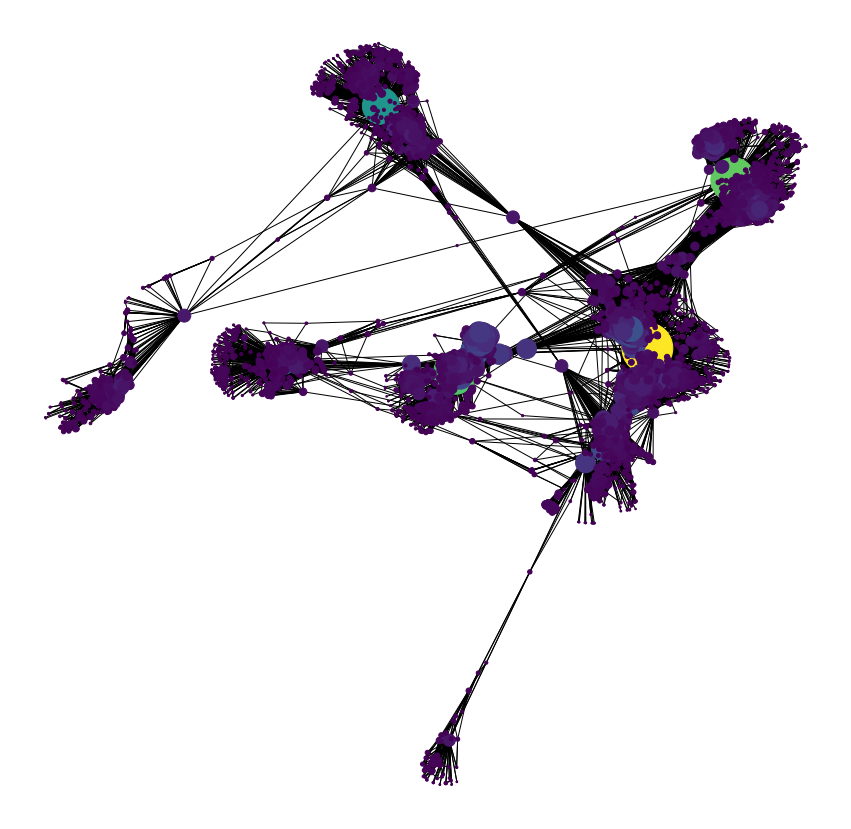

In [31]:
pos = nx.spring_layout(G1)
degCent = nx.degree_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]


In [32]:
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

### 3. Closeness Centrality

[107, 58, 428, 563, 1684]

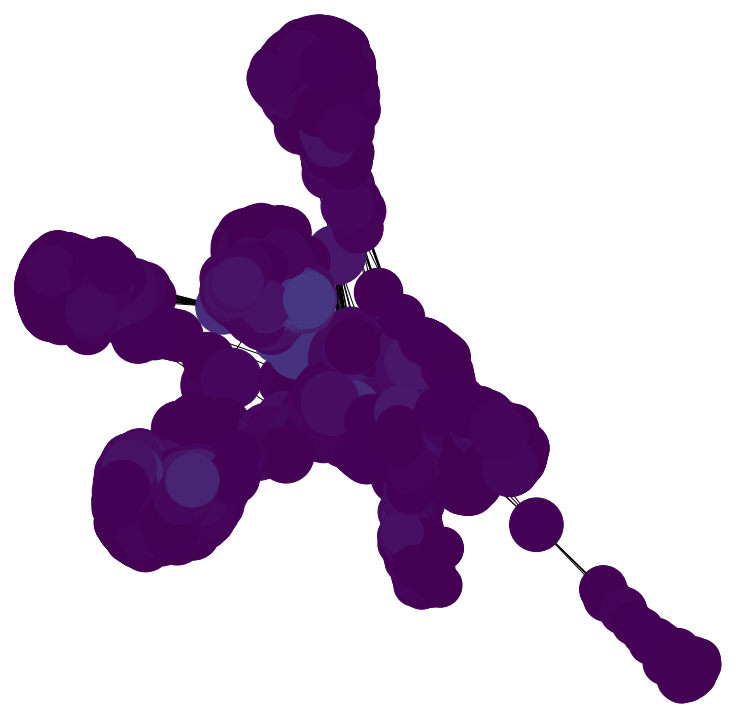

In [33]:
pos = nx.spring_layout(G1)
cloCent = nx.closeness_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

### 4. Degree Graph 

In [35]:
max(x for x,y in nx.degree(G1))

4038

### 5. Find Shortest Path

In [42]:
sources = [20,40,65,75]
targets = [650,802,920,1010] 
for i in range(4):
    path = nx.shortest_path(G1,source=sources[i],target=targets[i])
    length = nx.shortest_path_length(G1,source=sources[i],target=targets[i],method='dijkstra')
    print("Shortest Path between Node ", str(sources[i])," ---> ", str(targets[i]), " is ",
          str(path), " ,Length = ", str(length))

Shortest Path between Node  20  --->  650  is  [20, 0, 34, 414, 650]  ,Length =  4
Shortest Path between Node  40  --->  802  is  [40, 0, 58, 1684, 860, 698, 686, 802]  ,Length =  7
Shortest Path between Node  65  --->  920  is  [65, 0, 107, 920]  ,Length =  3
Shortest Path between Node  75  --->  1010  is  [75, 0, 107, 1010]  ,Length =  3


### 6. Find All Neighbors Nodes

In [45]:
neigh = [1,20,40,65,75,90,1000,]
for i in range(len(neigh)):
    all_neighbors = list(nx.classes.function.all_neighbors(G1,neigh[i]))
    print("All neighbors for Node ", str(neigh[i])," ---> ", str(all_neighbors))

All neighbors for Node  1  --->  [0, 48, 53, 54, 73, 88, 92, 119, 126, 133, 194, 236, 280, 299, 315, 322, 346]
All neighbors for Node  20  --->  [0, 2, 14, 41, 44, 111, 115, 149, 162, 214, 226, 312, 326, 333, 343]
All neighbors for Node  40  --->  [0, 21, 25, 26, 29, 56, 67, 72, 77, 113, 132, 133, 141, 142, 158, 169, 172, 199, 200, 203, 212, 213, 224, 231, 232, 239, 257, 258, 265, 271, 272, 274, 277, 280, 298, 304, 307, 315, 317, 322, 325, 329, 332, 334]
All neighbors for Node  65  --->  [0, 7, 13, 25, 82, 118, 203, 252, 261, 297, 314, 339]
All neighbors for Node  75  --->  [0, 9, 56, 67, 85, 170, 188, 200, 258, 272, 274, 304, 322, 323]
All neighbors for Node  90  --->  [0, 179]
All neighbors for Node  1000  --->  [107, 924, 974, 985, 1010, 1127, 1134, 1228, 1304, 1474, 1640, 1667, 1703, 1725, 1759, 1840]


In [46]:
list(nx.selfloop_edges(G1, keys=True, data=True))
#None []

[]

### 7. Count Degree Nodes 

In [49]:
d = dict(G1.degree()).values()
from collections import Counter
Counter(d)

Counter({1: 75,
         2: 98,
         3: 93,
         4: 99,
         5: 93,
         6: 98,
         7: 98,
         8: 111,
         9: 100,
         10: 95,
         11: 81,
         12: 82,
         13: 79,
         14: 87,
         15: 106,
         16: 82,
         17: 76,
         18: 73,
         19: 72,
         20: 63,
         21: 52,
         22: 63,
         23: 53,
         24: 60,
         25: 55,
         26: 56,
         27: 49,
         28: 37,
         29: 38,
         30: 40,
         31: 38,
         32: 44,
         33: 35,
         34: 43,
         35: 36,
         36: 43,
         37: 43,
         38: 44,
         39: 29,
         40: 27,
         41: 29,
         42: 21,
         43: 29,
         44: 21,
         45: 19,
         46: 24,
         47: 24,
         48: 24,
         49: 33,
         50: 25,
         51: 20,
         52: 19,
         53: 15,
         54: 23,
         55: 23,
         56: 18,
         57: 23,
         58: 15,
         59: 11,
   

Counter({347: 1,
         17: 76,
         10: 95,
         13: 79,
         6: 98,
         20: 63,
         8: 111,
         57: 23,
         1: 75,
         31: 38,
         15: 106,
         9: 100,
         16: 82,
         65: 20,
         11: 81,
         69: 14,
         68: 16,
         5: 93,

### 8. Eigenvector Centrality

(-0.7275155901908874,
 1.082262647151947,
 -0.8471710741519928,
 0.8376320660114288)

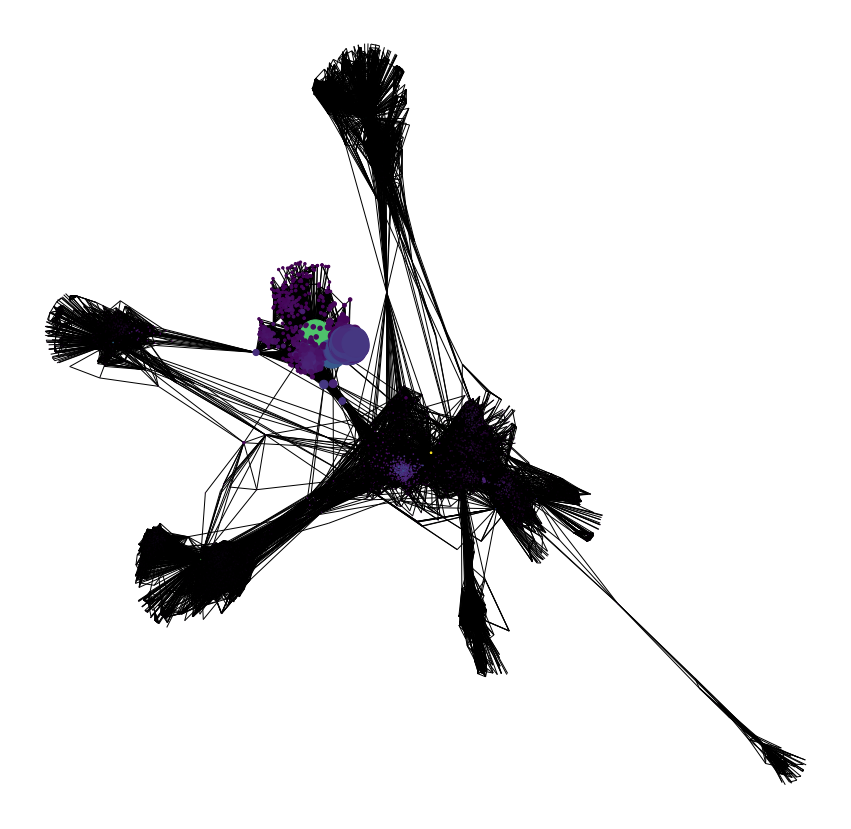

In [50]:
#pos = nx.spring_layout(G1)
eigCent = nx.eigenvector_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [51]:
sorted(eigCent, key=eigCent.get, reverse=True)[:5]

[1912, 2266, 2206, 2233, 2464]

In [ ]:
list(nx.algorithms.community.k_clique_communities(G1,k=2))

In [ ]:
list(nx.algorithms.core.k_core(G1,k=3))

In [ ]:
nx.algorithms.link_analysis.pagerank_alg.pagerank(G1)

309: 0.0001716312351638319,
 310: 0.0002748900516265396,
 311: 0.00011389444868967976,
 312: 0.000512080095393576,
 313: 0.00040923994446675024,
 314: 0.0001724333430201253,
 315: 0.0006036352914088951,
 316: 6.581490012111381e-05,
 317: 0.00011894544687680495,
 318: 0.00014689588991789368,
 319: 0.0002288806369282809,
 320: 0.0003079052496118058,
 321: 9.264483661467496e-05,
 322: 0.0007867992190291396,
 323: 0.0004294328223425148,
 324: 0.0003296617518206686,
 325: 0.0004112008723720156,
 326: 0.0003573420959917144,
 327: 0.0001275343277989076,
 328: 0.00021693170124186377,
 329: 0.00039887215508337934,
 330: 0.00022734496783426286,
 331: 0.00024087475782315885,
 332: 0.0004759881107568617,
 333: 0.00017122346243625503,
 334: 0.00031783678431852375,
 335: 5.2591423276218314e-05,
 336: 7.450715465063965e-05,
 337: 0.00020454700787763102,
 338: 0.00011254118253680223,
 339: 0.00035337088392488884,

In [ ]:
nx.degree_histogram(G1)

6